# The heart of Austin

In this tutorial, we will learn how to simulate the Heart Rate (HR) of ten citizens of Austin, TX. Our virtual study participants will be 10, 25-years old, individuals that sleep (8 hours a day), perform normal activites for the majority of the day (14 hours) and perform high-intensity exercise (2 hours a day). We will follow the participants over a period of one week, with measurements of their HR for every hour of the week.

The dataset we will provide opportunities to practice working with Numpy Arrays and randn, plotting time series and scatter plots using matplotlib. 

##### Learning outcomes:
 - Advanced operations with Numpy Arrays
 - Advanced indexing into Numpy Arrays
 - Simulation of datasets assuming normally distributed data (randn)
 - computation of basic descriptiv statistics (mean, median and standard deviation)
 - Data visualization using matplotlib
     - use of plot for simple data
     - use of plot for time series
     - use of scatter

In [1]:
# Before doing anything, we will import 
# all the stuff we think we need
import numpy as np
import matplotlib.pyplot as plt

### Setting up the simulation and the variables needed

Our simulation will use some basic concepts from statistics that you might be familiar with (but it does not really matter if you are not!). HR is measured in Beats Per Minute (BPM). The HR of a population are somehow variable across individuals and generally normally distributed. This means that folks have a higher HR at rest, others a lower one, etc.

The following will be the assumptions used for our simulation. 

###### Rest HR
The mean rest HR of a population of 25-years old individuals is about `75` BPM. The variance across individuals (the between samples variance) is about `10` BMP. This means that whereas the majority of the individuals will have a HR of about `75` BPM, several will have one as low as `55` BPM and others as high as `95` BPM. We will assume that the Rest HR will be associated with the Sleep and Exercise HR. 

###### Sleep HR
We will assume that the mean HR during sleep goes down by about 20 BPM from the population mean of `75` BPM. That means that an average individual will have an HR of `55` BPM during sleep. More generally that reduction corresponds to about `70%` reduction in HR during sleep (`55/75=0.733`). 

###### Exercise HR
We will use a commom computation an assume that max HR during a high-intensity exercise will be predicted as follows: `max HR = 220-Age`, that means that for our 25 years old Austinites the expected HR under high-intensity exercise is 195 BPM. That is about a `2.6` times higher than the base HR in the population. Sowe will use that number, `2.6` to do our calculations.

Remember, we are assuming a correlation between Rest HR, Sleep HR and Exercise HR. To simulate that, we can start by simulating ten individuals drawn randomly from the population of Austin with a Rest HR of 75 BPM. After that, we can simulate the Sleep HR as a modification of the distribution of Rest HR and similarly the Exercise HR as an increase of the distribution of Rest HR. In both cases, Sleep and Exercise HR will have their own variance added on top of the variance already existing in the group of ten Austinites. 

In [2]:
# Let's define the variables we need
n = 10 # We need the number of individuals 

# Population Rest Heart Rate definitions
hr_r = 75           # We need the aaverage Rest HR in Austin for 25-years old individuals 
hr_r_sd_factor = .1 # Standard Deviation factor for the Rest HR (10% of the mean)

# Population Sleep and Exercise definitions
hr_e_factor = 2.6   # We need the increase in HR from Rest during high-intensity exercise. 
                    # This will allow us to compute the Exercise HR given each 
                    #   individuals' Rest HR, say from `75 * 2.6 = 195`
hr_s_factor = .7    # Decrease in HR during sleep. HR during sleep is only about 
                    #   70% that during awake rest. Say `75 * 0.7 = 52.5`
add_var_factor =.05 # Factor determining the additional variance added to HR during 
                    #   Sleep and Exercise periods (variance beyond Rest HR variance).

# Time variables
duration_exercise = 2  # Number of hours of high-intensity exercise per day
duration_sleep    = 8  # Number of hours of sleep per day
duration_day      = 24 # Number of hours in a day
duration_week     = 7  # Number of days in a week

### Simulating the Rest HR for 10 individuals

Next, we will compute the distribution of HR across the 10 individuals
by implementing the following assumptions:
 - The Rest HR of all individuals comes from the same population, that is the distribution of Austin
 - The Rest, Sleep and Exercise HR are correlated with eachothers for a subject (i.e., if a subejct has a high Rest HR, the Exercise and Sleep HR will also be higher).

In [3]:
# First we define the variables needed for the *Rest HR* 
Rest_mean = hr_r # This is the mean HR of all 25-years old Austinites 
Rest_SD = Rest_mean * hr_r_sd_factor # we set the SD to be 10% of the mean HR

# We will create the distribution of rest HR using randn 
#
# randn generates random numbers with mean 0 and SD = 1
# To match the needed distribution in our situation
# we add to the numbers generated by `randn` the mean HR 
# and multiple by the SD of the HR
hr_rest_individuals = Rest_mean + Rest_SD * np.random.randn(n,1) 

# Next, we will sort the individuals from the lowest to the highest Resting HR
# This will represent our simulated distribution of 25-years old Austinites' HR
# It will be the base for many of the following operations
hr_rest_individuals = np.sort(hr_rest_individuals, axis=0)  # sorts within the 10 rows of the 1st column

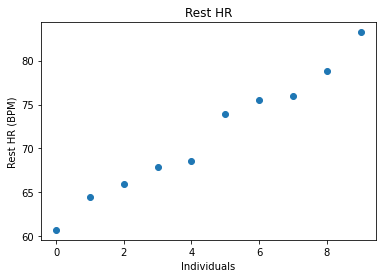

In [4]:
# Let's plot these individuals 
plt.plot(hr_rest_individuals, "o");
plt.title('Rest HR');
plt.xlabel('Individuals');
plt.ylabel('Rest HR (BPM)');

Questions:
 - What is the mean HR?
 - What was supposed to be?
 - Why are they different

### Simulating the Exercise HR for 10 individuals

Next, we will compute the distribution of HR across the same 10 individuals, but during high-intensity exercises. We will call this Exercise HR. The assumptions in the simulation below are the same as those in the previous section. Hereafter, we also assume that there is a correlation between the Rest HR and the Exercise HR.

In [5]:
# Exercise HR

# The mean HR of all 25-years old Austinites 
#  during high-intensity Exercise. Not how we start from the Rest HR
# After thatm, we scale the values to the mean Exercise HR, 
#  this operation assures a correlation of 1 between the Rest and Exercise HR 
Exercise_mean = hr_rest_individuals * hr_e_factor

# We reduce the correlation between Rest and Exercise HR by adding a small
#  variation (Standard Deviation, SD) to the Exercise HR data  
Exercise_SD = hr_rest_individuals * add_var_factor #multiplies the resting hr of the 10 individuals (graphed above) by .05

# We will create the distribution of rest HR using randn 
#
# randn generates random numbers with mean 0 and SD = 1
# To match the needed distribution in our situation
#  we add to the numbers generated by `randn` the mean HR 
#  and multiple by the SD of the HR
hr_exercise_individuals = Exercise_mean + Exercise_SD * np.random.randn(n,1) 

# Note that here we do not sort. This is because sorting would make us loose 
#  the pairing between hr_exercise_individuals and hr_rest_individuals.
# Instead, we want to keep the entries in the two arrays paired, so that
#  subject 1 in the first array corresponds to subject 1 in the second.

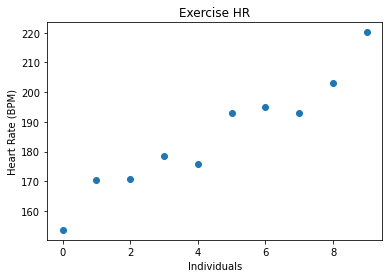

In [6]:
plt.plot(hr_exercise_individuals, "o"); 
plt.title('Exercise HR');
plt.xlabel('Individuals');
plt.ylabel('Heart Rate (BPM)');

Questions:
 - What is the mean HR?
 - What was supposed to be?
 - Why are they different

### Simulating the Sleep HR for 10 individuals

Finally, we will compute the distribution of HR across the same 10 individuals, but during sleep. We will call this Sleep HR. The assumptions in the simulation below are the same as those in the previous section. Hereafter, we also assume that there is a correlation between the Rest HR and the Sleep HR.

In [7]:
# Sleep HR

# The mean HR of all 25-years old Austinites 
#  during Sleep. Not how we start from the Rest HR
Sleep_mean = hr_rest_individuals * hr_s_factor

# We reduce the correlation between Rest and Sleep HR by adding a small
#  variation (Standard Deviation, SD) to the Sleep HR data  
Sleep_SD = hr_rest_individuals * add_var_factor

# We will create the distribution of rest HR using randn 
#
# randn generates random numbers with mean 0 and SD = 1
# To match the needed distribution in our situation
#  we add to the numbers generated by `randn` the mean HR 
#  and multiple by the SD of the HR
hr_sleep_individuals = Sleep_mean + Sleep_SD * np.random.randn(n,1) 

# Note that here we do not sort. This is because sorting would make us loose 
#  the pairing between hr_exercise_individuals and hr_rest_individuals.
# Instead, we want to keep the entries in the two arrays paired, so that
#  subject 1 in the first array corresponds to subject 1 in the second.

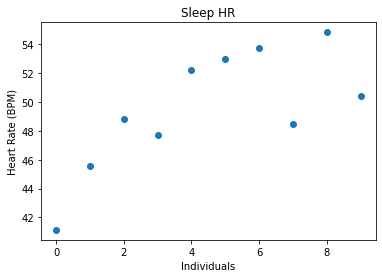

In [8]:
plt.plot(hr_sleep_individuals, "o"); 
plt.title('Sleep HR');
plt.xlabel('Individuals');
plt.ylabel('Heart Rate (BPM)');

Questions:
 - What is the mean HR?
 - What was supposed to be?
 - Why are they different

### Next, let take a look at the three samples (Rest, Exercise and Sleep)

Above we have generate three samples representing the Sleep, Rest and Exercise Heart Rate for `n` individulas form Austin. We would like to take a look at the results and compare the samples. To do so, we can try to plot them together, in the same plot, say to see their overall relationships.

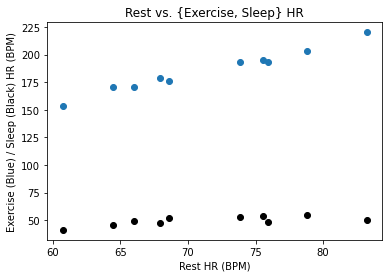

In [9]:
plt.scatter(hr_rest_individuals, hr_sleep_individuals, color='k');
plt.scatter(hr_rest_individuals, hr_exercise_individuals);
plt.title('Rest vs. {Exercise, Sleep} HR');
plt.xlabel('Rest HR (BPM)');
plt.ylabel('Exercise (Blue) / Sleep (Black) HR (BPM)');

As it can be seen the plot is not very helpful. This is primarily due to the major difference in means between the two samples (Exercise and Sleep) that pushes the Sleep sample all the way down. But we can always look at the two scatter plots independently. To do this we will use a little more advanced plto command that will allow us to have two plots in the same row.

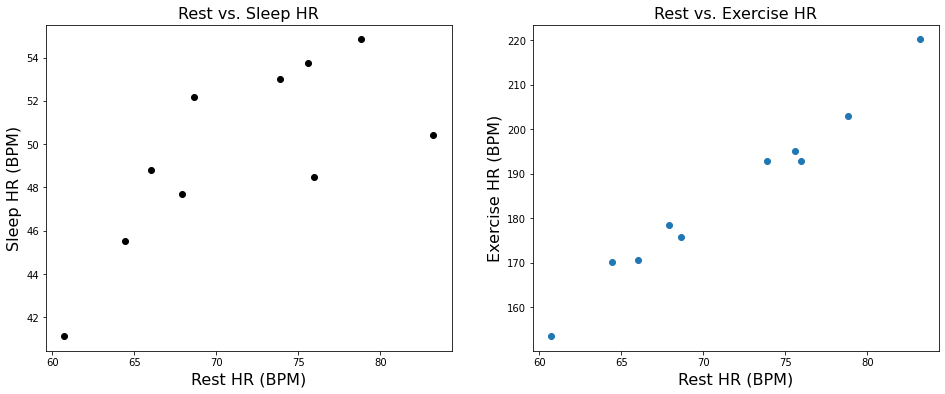

In [10]:
FontSize = 16 # Note. I am setting s slightly larger font size, it looks better

fig, ax = plt.subplots(1,2, figsize=(16,6)); # Here I open a few sub-plots and set the figure size

# I do the actul plot of the `rest HR` below
ax[0].scatter(hr_rest_individuals, hr_sleep_individuals, color='k'); 

# The three lines below, set the lables and the titles 
#   with the font size I chose above.
ax[0].set_xlabel("Rest HR (BPM)", fontsize=FontSize); 
ax[0].set_ylabel("Sleep HR (BPM)", fontsize=FontSize);
ax[0].set_title('Rest vs. Sleep HR', fontsize=FontSize);

# The lines below are identical to the ones above but for `exercise`
ax[1].scatter(hr_rest_individuals, hr_exercise_individuals);
ax[1].set_xlabel("Rest HR (BPM)", fontsize=FontSize);
ax[1].set_ylabel("Exercise HR (BPM)", fontsize=FontSize);
ax[1].set_title('Rest vs. Exercise HR', fontsize=FontSize);

### Simulating a week full of  Austinites' heart beats

Next, we will want to simulate the 7-days of a week so to start simulating the data across hours and days of the 10 Austinites. To do so we will use a single numpy array. 

Let's do some calculations. We have 24 hours in a day and 7 days in a week. Given that our measurements come at one HR-value per hour and we have `n` subjects (10), we will need to initialize an array that is 168 x 10.

The array will need to hold the Rest HR between 9am and 9pm, the Exercise HR between 6 and 8 am and the Sleep HR between 10pm and 5am. Note that we will assume that all participants will exercise at the same time, between 6 and 8 am, say, before going to work. We will also assume that all the participants will go to bed at the same time 10 pm.

To simulate the full dataset across all days, we will need to insert the proper HR in the proper slots of the numpy array. This is our opportunity to practice array indexing. So let's get started. 

We will first simulate the array that will contain the full set of time series. We will initialize the array with all `zeros` with one dimension containing the number of subjects (`n`) and the other the number of hours in a week (`24*7=168`).

After initializing the array, we will then substitute the appropriate slots with the values simulated for Sleep, Rest or Exercise HR. If you do n ot rememebr, these values are the ones shown in the last two plots. One value per period (Sleep, Rest and Exercise) was simulated above, one value per period and per subject. 

In [11]:
# The first thing we will do is to simulate 
#   the array to hold 10 individuals and 7 x 24 hours
#   this means that we will need to create an array 10 x 168 
HR_time_series = np.zeros([n, duration_day*duration_week])

Our goal next is to set different locations in the array `HR_time_series` to the different values of HR for Sleep, Rest and Exercise. To do so, we need to identify the correct hours in each day.

Below we created an approach to do that. First, we create a START and END hour for each activity in a day. For example, if exercises start at 6 am and end at 8 am we will set up a variable (a numpy array) with `6` in the first slot and `8` in the second, e.g., `a_numpy_array[0]=6` and `a_numpy_array[1]=8`. 

These variables will be convenient, butthey are not necessary. Indexing could be done, manually entering indices one by one. But after thinking the problem, the indices for one day can be *transofrmed* into indices for the second day by adding the number `24` to them. Similarly, the indices for the third day are the indices for the second day plus `24`. So, in this case we identified a conveneient trick, an approach that allow us to populate the correct days from 1-7 by reating first arrays holding the correct indcies only for day 1 and then simply transofrming the indices for day one to day two, three, four, etc by adding 24, multiple times, sequentially.

Below the code. First we define indices for each segment in our Day 1. After that we use the indices to populate day 1. Firnally, we tranform the indices for day 1 to those for day 2 by adding the number 24 (24 hours). We do this multiple times until we reach day 7. The last day of the week.

Let's see how it works and let's visualize the array as we fill it out with HR numbers.

In [12]:
# Preparing indices to address the 168 hours.
#
# After creating the array we will want to create helpful variables
#   holding the indices into the array for the various periods
#   sleep, exercise and rest.

# So, we will need to index the different time allocations, sleep, rest, exercise 
#   in the propert hour-slots, for each day of the week. To do so, we prepare
#   variables that will hold the time slots in hours of the day, 
#   yet, coded in 0-based Python indices (the `-1` below will do this trick).
time_exercise = np.array([6,8])-1      # Hours of the day exercise start and end 
                                       #   in python's 0-based indexing
time_rest     = np.array([8,22])-1     # Hours of the day the normal 'rest' activities
                                       #   start and end in python's 0-based indexing
                                       #   8 am to 10 pm
        
# We will treat Sleeptime as divided into night sleep (until midnight) 
#   and morning sleep 12-5am. This will help with some of the indexing we will
#   need to do.
time_sleep_n  = np.array([22,25])-1    # Hours of the *night* dedicated to sleep
                                       #   start and end in python's 0-based indexing
                                       #   10 pm to 12 am
time_sleep_m  = np.array([1,6])-1     # Hours of the *morning* dedicated to sleep
                                       #   start and end in python's 0-based indexing
                                       #   12 am to 6 am

##### Simulating the Exercise HR in the morning hours
Ok, after setting up the variables to use for indexing. Let's start populating our time series. To do so, we will use precisely the variables generated above. The variables, will facilitate addressing the proper locations in `HR_time_series`.

In [13]:
# To prepare for adding in the Exercise HR 
#   will then want to zero-out all
#   the time series in the relevant 2-hours.

# Day 1:
# We build a range of indices between the start and end point
day1 = np.arange(time_exercise[0],time_exercise[1])
HR_time_series[:,day1] = hr_exercise_individuals

# To use the same variables created above for day 1 and get 
# the correct indices for day 2, 3 ,4 etc, we will add 24 
# (duration_day) cumulatively to each new day

# Day 2:
day2 = day1 + duration_day # adding 24 to the indices of day 1
HR_time_series[:,day2] = hr_exercise_individuals

# Day 3:
day3 = day2 + duration_day  # adding 24 to the indices of day 2
HR_time_series[:,day3] = hr_exercise_individuals

# Day 4:
day4 = day3 + duration_day # adding 24 to the indices of day 3
HR_time_series[:,day4] = hr_exercise_individuals

# Day 5:
day5 = day4 + duration_day  # adding 24 to the indices of day 4
HR_time_series[:,day5] = hr_exercise_individuals

# Day 6:
day6 = day5 + duration_day  # adding 24 to the indices of day 5
HR_time_series[:,day6] = hr_exercise_individuals

# Day 7:
day7 = day6 + duration_day  # adding 24 to the indices of day 6
HR_time_series[:,day7] = hr_exercise_individuals

Let's take a look at the time series we  just created. It should have the mean HR for each participant in the time slots (hours) allocated. 

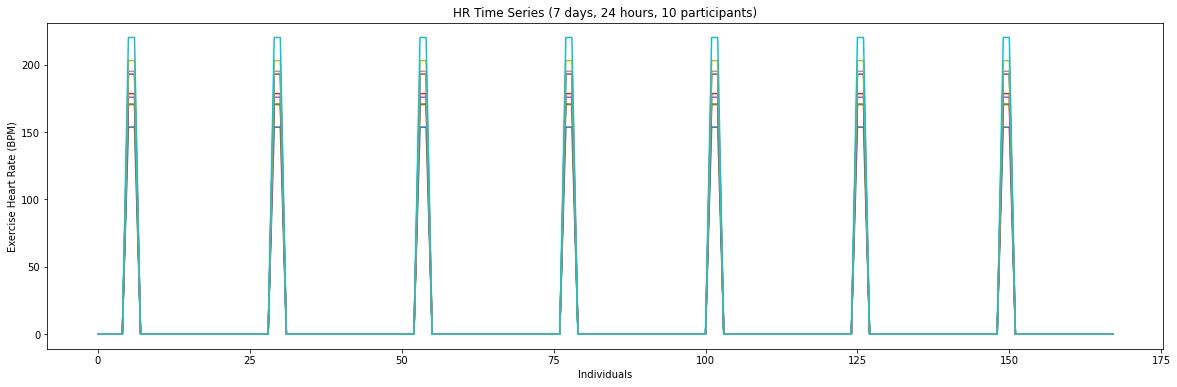

In [14]:
plt.figure(figsize=(20,6))
plt.plot(HR_time_series.T); 
plt.title('HR Time Series (7 days, 24 hours, 10 participants)');
plt.xlabel('Individuals');
plt.ylabel('Exercise Heart Rate (BPM)');

##### Simulating the Rest HR in the day hours
Next we will simulate the time series for the Rest HR during the day-light hours. Let's start populating our time series. To do so, we will use the variable `HR_time_series` and `hr_rest_individuals` as value to populate.

The code will be extremely similar at the one used for the Exercise HR!

In [15]:
# Adding in the Rest HR

# Day 1:
day1 = np.arange(time_rest[0],time_rest[1]) # begins at 8 am and ends at 10 pm
HR_time_series[:,day1] = hr_rest_individuals

# To use the variables we created about and get the indices 
# to go into the proper location for each subsequent data
# We will add the 24 (duration_day) variable to each new day

# Day 2:
day2 = day1 + duration_day
HR_time_series[:,day2] = hr_rest_individuals

# Day 3:
day3 = day2 + duration_day
HR_time_series[:,day3] = hr_rest_individuals

# Day 4:
day4 = day3 + duration_day
HR_time_series[:,day4] = hr_rest_individuals

# Day 5:
day5 = day4 + duration_day
HR_time_series[:,day5] = hr_rest_individuals

# Day 6:
day6 = day5 + duration_day
HR_time_series[:,day6] = hr_rest_individuals

# Day 7:
day7 = day6 + duration_day
HR_time_series[:,day7] = hr_rest_individuals

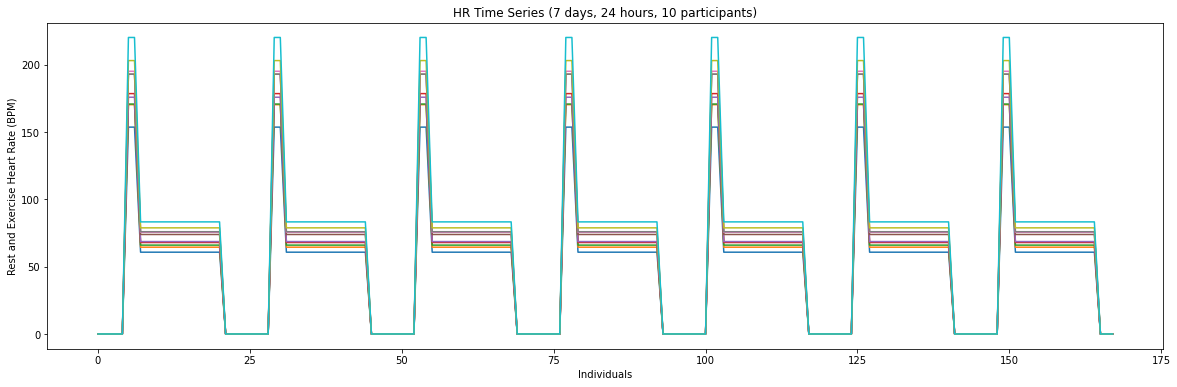

In [16]:
plt.figure(figsize=(20,6))
plt.plot(HR_time_series.T); # Note here we need to rotate (transpose the array for plotting)
plt.title('HR Time Series (7 days, 24 hours, 10 participants)');
plt.xlabel('Individuals');
plt.ylabel('Rest and Exercise Heart Rate (BPM)');

##### Simulating the Sleep HR in the day hours
Finally, we will simulate the time series for the Sleep HR. This HR is a little bit more complicated. Indeed, we had to create one variable for the morning and one for the evening. This was the way we decided to keep a 24-hours cycle while also assigning some ofthe ours of sleep to the night (10 pm - 12 am) and others to the morning (1 - 5 am).

So for sleep we will populate the time series using `hr_sleep_individuals` as value. But in this case we will need to deal with a day divided into two fragments. Nights and mornings. This is because our indices are notcircular, the do not wrap around midnight like hours of a day do.

The code will be a little bit longer but conceptually similar.

In [17]:
# Adding in the Sleep HR
# Below we repeate the same operations already described above.
# We have to do it twice, onces for the evening segment and the other
# time for the moring segment of the sleep period.

# NIGHT fragment of the sleep hours
#
# Day 1:
day1 = np.arange(time_sleep_n[0],time_sleep_n[1]) # from 10 pm to 12:59 am
HR_time_series[:,day1] = hr_sleep_individuals

# Day 2:
day2 = day1 + duration_day
HR_time_series[:,day2] = hr_sleep_individuals

# Day 3:
day3 = day2 + duration_day
HR_time_series[:,day3] = hr_sleep_individuals

# Day 4:
day4 = day3 + duration_day
HR_time_series[:,day4] = hr_sleep_individuals

# Day 5:
day5 = day4 + duration_day
HR_time_series[:,day5] = hr_sleep_individuals

# Day 6:
day6 = day5 + duration_day
HR_time_series[:,day6] = hr_sleep_individuals

# Day 7:
day7 = day6 + duration_day
HR_time_series[:,day7] = hr_sleep_individuals

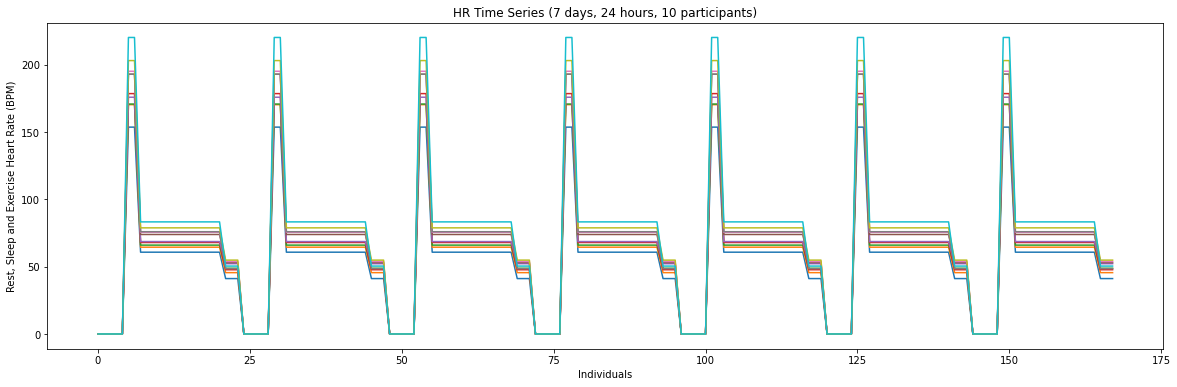

In [18]:
plt.figure(figsize=(20,6))
plt.plot(HR_time_series.T); # Note here we need to rotate (transpose the array for plotting)
plt.title('HR Time Series (7 days, 24 hours, 10 participants)');
plt.xlabel('Individuals');
plt.ylabel('Rest, Sleep and Exercise Heart Rate (BPM)');

In [19]:
# MORNING fragment of the sleep hours
#
# Day 1:
day1 = np.arange(time_sleep_m[0],time_sleep_m[1]) # from 1 am to 5:59 am
HR_time_series[:,day1] = hr_rest_individuals

# Day 2:
day2 = day1 + duration_day
HR_time_series[:,day2] = hr_sleep_individuals

# Day 3:
day3 = day2 + duration_day
HR_time_series[:,day3] = hr_sleep_individuals

# Day 4:
day4 = day3 + duration_day
HR_time_series[:,day4] = hr_sleep_individuals

# Day 5:
day5 = day4 + duration_day
HR_time_series[:,day5] = hr_sleep_individuals

# Day 6:
day6 = day5 + duration_day
HR_time_series[:,day6] = hr_sleep_individuals

# Day 7:
day7 = day6 + duration_day
HR_time_series[:,day7] = hr_sleep_individuals

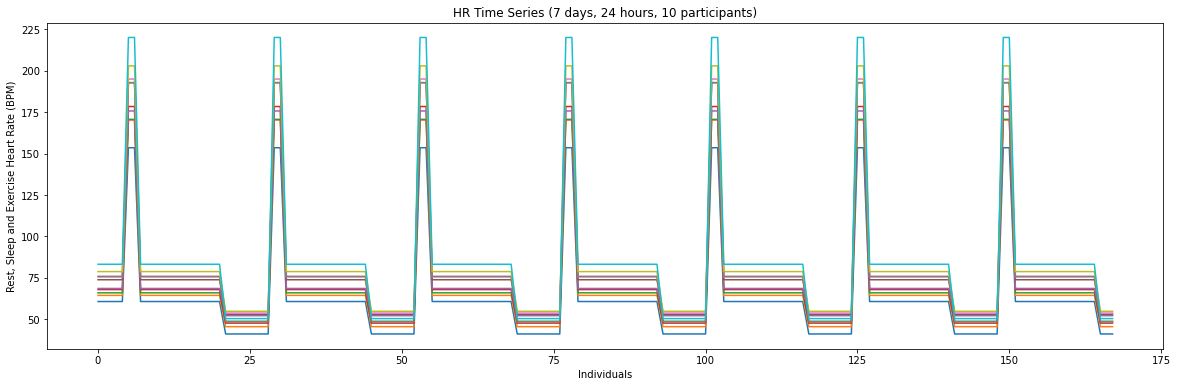

In [20]:
plt.figure(figsize=(20,6))
plt.plot(HR_time_series.T); # Note here we need to rotate (transpose the array for plotting)
plt.title('HR Time Series (7 days, 24 hours, 10 participants)');
plt.xlabel('Individuals');
plt.ylabel('Rest, Sleep and Exercise Heart Rate (BPM)');

##### Using imshow to visualize the time series array
We can also try imshow. We have used that before to  show the content of numpy arrays. It might be a  helpful  visualization, providing a different via of the data and variability across participants. 

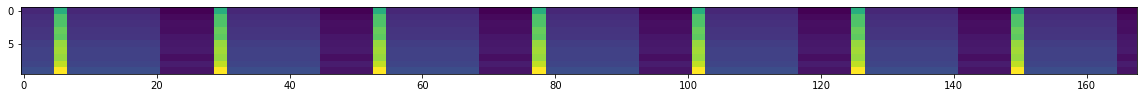

In [21]:
plt.figure(figsize=(20,6))
plt.imshow(HR_time_series);

That seems to help a little. We can see colors for each band. Each color is a participant's individual HR during the 2 hours time frame of exercise. There a color gradient because the subjects are sorted by HR.

#### Done with this tutorial! 